In [116]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import scipy as scp
from scipy.integrate import trapezoid
import numpy as np
import awkward as ak

In [117]:
#Open root file with both shapes and measurements

FILE_PATH = "../ToConvertRootFile/Run_Na_Couples_CDF20_Data_5_9_2024_Ascii.root" #Relative file path
file = uproot.open(FILE_PATH)
file["tree"].show() #Display contents

"""FILE_PATH='../Dati/Run_cfd_0.5_ledge_meas_only_Measurements_Only_5_9_2024_0000.root'
file2=uproot.open(FILE_PATH)
print("\n")
file2["tree"].show()"""

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ev                   | int32_t                  | AsDtype('>i4')
nch                  | int32_t                  | AsDtype('>i4')
ch                   | int32_t[]                | AsJagged(AsDtype('>i4'))
base                 | float[]                  | AsJagged(AsDtype('>f4'))
amp                  | float[]                  | AsJagged(AsDtype('>f4'))
charge               | float[]                  | AsJagged(AsDtype('>f4'))
letime               | float[]                  | AsJagged(AsDtype('>f4'))
tetime               | float[]                  | AsJagged(AsDtype('>f4'))
ratecount            | float[]                  | AsJagged(AsDtype('>f4'))
pshape               | float[][1024]            | AsJagged(AsDtype("('>f4', (...


'FILE_PATH=\'../Dati/Run_cfd_0.5_ledge_meas_only_Measurements_Only_5_9_2024_0000.root\'\nfile2=uproot.open(FILE_PATH)\nprint("\n")\nfile2["tree"].show()'

In [118]:
print(type(file["tree"]["base"].array()))
bl=file["tree"]["base"].array()
print(ak.num(bl))
#bl = bl[:-1]
print(np.unique(ak.num(bl)))
#l'ultimo array aveva una forma diversa, quindi l'ho tagliato altrimenti faceva casini

<class 'awkward.highlevel.Array'>
[12, 12, 12, 12, 12, 12, 12, 12, 12, ..., 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12]


In [119]:
nch=file["tree"]["ch"].array()
print(nch)

[[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ..., [4, 5, 6, 7, ..., 13, 14, 15]]


In [120]:
#Load data to numpy arrays

baselines = np.array(file["tree"]["base"].array()) 
charges = np.array(file["tree"]["charge"].array())
amp = np.array(file["tree"]["amp"].array())
lead_edge = np.array(file["tree"]["letime"].array())
t_edge = np.array(file["tree"]["tetime"].array())
channel= np.array(file["tree"]["ch"].array())
waveform = np.array(file["tree"]["pshape"].array())

In [121]:
N_ev=len(charges[:, 0])
print(N_ev)

100000


In [122]:
print(len(waveform[0][0]))

1024


-1.0
[    2    10    12 ... 99940 99957 99986]
7048


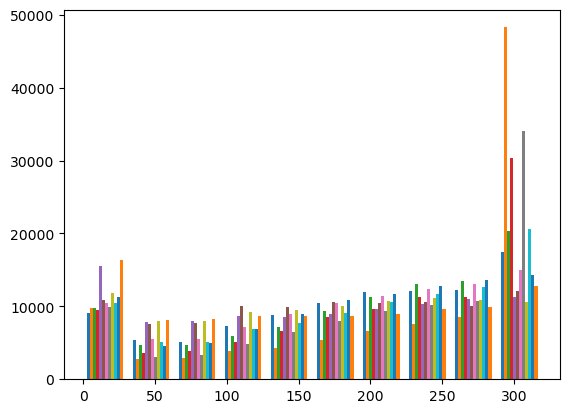

In [123]:
plt.hist(t_edge)
print(np.min(t_edge))
print(np.where(t_edge[:,1]==-1)[0])
print(len(np.where(t_edge[:,1]==-1)[0]))


(array([[ 6173.,  8983., 16413.,  7396.,  7857.,  9443.,  9532.,  9813.,
          9491., 14899.],
        [ 3949.,  6733., 14784.,  4279.,  3620.,  4599.,  5116.,  5597.,
          6163., 45160.],
        [ 5887.,  7960., 12661.,  5979.,  6559.,  8268., 10100., 10988.,
         11873., 19725.],
        [ 4477.,  7404., 12990.,  5612.,  6449.,  7625.,  8867.,  9291.,
          9350., 27935.],
        [10064., 13158., 21401.,  8461.,  7855.,  7824.,  7959.,  7880.,
          7747.,  7651.],
        [ 9173., 10478., 20274., 10269.,  8611.,  8318.,  7714.,  7620.,
          7533., 10010.],
        [ 7051.,  8913., 17255.,  7458.,  7956.,  9020.,  9633., 10072.,
         10134., 12508.],
        [ 3882.,  6592., 15241.,  5152.,  5843.,  7287.,  8101.,  8459.,
          8379., 31064.],
        [ 9489., 10421., 16143.,  9680.,  8647.,  9143.,  9240.,  9359.,
          9096.,  8782.],
        [ 6197.,  7679., 13966.,  7431.,  7197.,  8175.,  8990.,  9916.,
         10935., 19514.],
        [ 

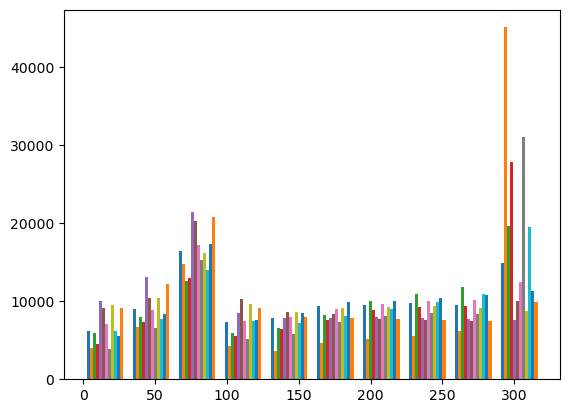

In [124]:
plt.hist(lead_edge)

(100000, 12, 1024)
channel: 4 baseline: 4.7e-05 charge -3.163 lead_edge 105.182 trailing_edge 111.18
105.182 111.18
channel: 5 baseline: -0.006924 charge 40.253 lead_edge 2.209 trailing_edge 4.377
2.209 4.377


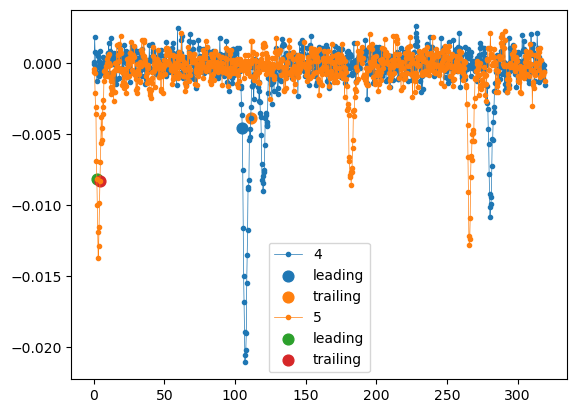

In [125]:
print(waveform.shape)
event= 1000
#tra 5 e 13
list = [4,5,6,7,8,9,10,11,12,13,14,15]
list=[4,5]
sampling=0.312
for channel in list:
    time=np.arange(1024)
    plt.plot(time*sampling, waveform[event][channel], '.-', label='{}'.format(channel), linewidth=0.5)
    print("channel:", channel, "baseline:",  baselines[event][channel],"charge", charges[event][channel], "lead_edge", lead_edge[event][channel], "trailing_edge", t_edge[event][channel] )
    t1=lead_edge[event][channel]
    t2=t_edge[event][channel]
    print(t1,t2)
    plt.scatter( t1, waveform[event][channel][int(t1/sampling)],s=60 ,  label='leading'  )
    plt.scatter( t2, waveform[event][channel][int(t2/sampling)],s=60,  label='trailing'  )
    plt.legend()
    #plt.xlim(400,600)
    #plt.ylim(-0.01, 0.1)

plt.legend()

In [126]:
canale=[0,1,2,3,4,5,8,9,12,13,14,15]
#l'ultimo è il 15
carica_gamma=[-492.991122,-869.542194, -755.683667, -1125.16284, -1223.87088, -1268.36734, 0, 0, -879.024502, -440.515158,0, 0,  -706.002694,
              -734.448274, -1088.07980, -1595.94856]
sigma_gamma=[55.3238139,60.6593683, 68.7226953, 89.3657356,  82.0439831, 97.4454060, 0, 0,  131.835623, 34.3645975, 0, 0, 122.979607,
             72.0804643, 79.5176462 ,95.8597859]
n=4 #sigma che accettiamo

firstch_limits=[[carica_gamma[0]-n*sigma_gamma[0], carica_gamma[0]+n*sigma_gamma[0]], [carica_gamma[4]-n*sigma_gamma[4], carica_gamma[4]+n*sigma_gamma[4]], [carica_gamma[5]-n*sigma_gamma[5], carica_gamma[5]+n*sigma_gamma[5]] ,
 [carica_gamma[9]-n*sigma_gamma[9], carica_gamma[9]+n*sigma_gamma[9]] , [carica_gamma[12]-n*sigma_gamma[12], carica_gamma[12]+n*sigma_gamma[12]] , 
 [carica_gamma[14]-n*sigma_gamma[14], carica_gamma[14]+n*sigma_gamma[14]]]

secondch_limits=[[carica_gamma[8]-n*sigma_gamma[8], carica_gamma[8]+n*sigma_gamma[8]], [carica_gamma[1]-n*sigma_gamma[1], carica_gamma[1]+n*sigma_gamma[1]], [carica_gamma[13]-n*sigma_gamma[13], carica_gamma[13]+n*sigma_gamma[13]] ,
 [carica_gamma[2]-n*sigma_gamma[2], carica_gamma[2]+n*sigma_gamma[2]] , [carica_gamma[3]-n*sigma_gamma[3], carica_gamma[3]+n*sigma_gamma[3]] , 
 [carica_gamma[15]-n*sigma_gamma[15], carica_gamma[15]+n*sigma_gamma[15]]]

# Da qui analisi

In [127]:
#liste con le coppie

coppia=np.array([ [4,5], [6,7], [8,9], [10,11], [12,13], [14,15] ])

firstch = coppia[:,0]
secondch = coppia[:,1]


map = np.repeat(-1,16)

for i in range(16):
    if np.where(coppia.flatten()==i)[0].size>0:
        map[i]=np.where(coppia.flatten()==i)[0]
print(map)

firstch_limits=    [  [carica_gamma[coppia[i][0]]-n*sigma_gamma[coppia[i][0]], carica_gamma[coppia[i][0]]+n*sigma_gamma[coppia[i][0]] ] for i in range(len(coppia))]
secondch_limits= [  [carica_gamma[coppia[i][1]]-n*sigma_gamma[coppia[i][0]], carica_gamma[coppia[i][1]]+n*sigma_gamma[coppia[i][1]] ] for i in range(len(coppia))   ]

firstch_trigger=[-0.028, -0.035, -0.028, -0.03, -0.03, -0.035]
secondch_trigger = [-0.03, -0.027, -0.022, -0.03, -0.028, -0.04]

paired_amp_1 = []
paired_charge_1 = []
paired_letime_1 = []
paired_wf_1 = []

paired_amp_2 = []
paired_charge_2 = []
paired_letime_2 = []
paired_wf_2 = []

whichpair=[]

for event in range(N_ev):
    for channel1,channel2, limF, limS in zip(map[firstch],map[secondch],firstch_limits,secondch_limits):
        #controllo se c'è un evento nel primo della coppia
        if(charges[event][channel1] >= limF[0] and charges[event][channel1] <= limF[1]):
            #se sì, vedo se ce n'è uno anche nel secondo della coppia
            if (charges[event][channel2] >= limS[0] and charges[event][channel2] <= limS[1]):
                #salvo i parametri del primo canale della coppia
                whichpair.append(channel1)

                paired_amp_1.append(amp[event][channel1])
                paired_charge_1.append(charges[event][channel1])
                paired_letime_1.append(lead_edge[event][channel1])
                paired_wf_1.append(waveform[event][channel1])

                paired_amp_2.append(amp[event][channel2])
                paired_charge_2.append(charges[event][channel2])
                paired_letime_2.append(lead_edge[event][channel2])
                paired_wf_2.append(waveform[event][channel2])
                



        


[-1 -1 -1 -1  0  1  2  3  4  5  6  7  8  9 10 11]


In [128]:
#loop alternativo senza filtri sulla carica

#nell'analisi successiva ho usato tutti gli eventi, senza filtri

for event in range(N_ev):
    for channel1,channel2, limF, limS in zip(map[firstch],map[secondch],firstch_limits,secondch_limits):
    
        whichpair.append(channel1)

        paired_amp_1.append(amp[event][channel1])
        paired_charge_1.append(charges[event][channel1])
        paired_letime_1.append(lead_edge[event][channel1])
        paired_wf_1.append(waveform[event][channel1])

        paired_amp_2.append(amp[event][channel2])
        paired_charge_2.append(charges[event][channel2])
        paired_letime_2.append(lead_edge[event][channel2])
        paired_wf_2.append(waveform[event][channel2])

In [129]:
print(firstch, secondch)
print([map[ch] for ch in firstch])
print([map[ch] for ch in secondch])

[ 4  6  8 10 12 14] [ 5  7  9 11 13 15]
[0, 2, 4, 6, 8, 10]
[1, 3, 5, 7, 9, 11]


(array([100028.,      0., 100000.,      0., 105271.,      0., 100000.,
             0., 108122., 100021.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

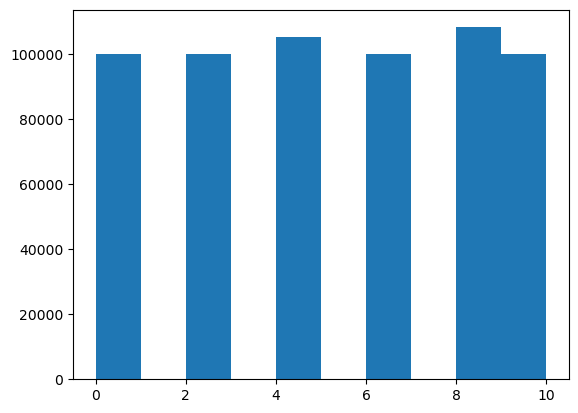

In [130]:
#vediamo se triggerano tutti allo stesso modo
plt.hist(whichpair)

613442
[0.        0.0078125 0.015625  0.0234375 0.03125   0.0390625]


(0.0, 100.0)

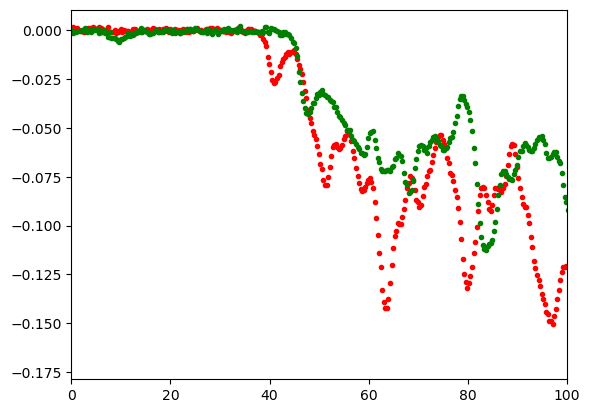

In [203]:
#plot di un evento tipo

print(len(paired_amp_1))
whichpair=np.array(whichpair)/2
print(np.unique(whichpair))

plt.plot(time*sampling, paired_wf_1[4], '.', color = 'red')
plt.plot(time*sampling, paired_wf_2[4], '.', color = 'green')
plt.xlim(0, 100)

In [133]:
#trigger di ogni canale
"""firstch_trigger=[-0.028, -0.035, -0.028, -0.03, -0.03, -0.035]
secondch_trigger = [-0.03, -0.027, -0.022, -0.03, -0.028, -0.04]

triggering_index_1=[np.where(paired_wf_1[ind] <= firstch_trigger[pair])[0][0] for ind, pair in enumerate(whichpair)]
triggering_index_2=[np.where(paired_wf_2[ind] <= secondch_trigger[pair])[0][0] for ind, pair in enumerate(whichpair)]

#convert to numpy array
triggering_index_1= np.array(triggering_index_1)
triggering_index_2= np.array(triggering_index_2)
rough_timeres=(triggering_index_1 - triggering_index_2)*2.5
print(np.argmax(rough_timeres))
print(rough_timeres)
plt.hist(rough_timeres, bins=40)"""

'firstch_trigger=[-0.028, -0.035, -0.028, -0.03, -0.03, -0.035]\nsecondch_trigger = [-0.03, -0.027, -0.022, -0.03, -0.028, -0.04]\n\ntriggering_index_1=[np.where(paired_wf_1[ind] <= firstch_trigger[pair])[0][0] for ind, pair in enumerate(whichpair)]\ntriggering_index_2=[np.where(paired_wf_2[ind] <= secondch_trigger[pair])[0][0] for ind, pair in enumerate(whichpair)]\n\n#convert to numpy array\ntriggering_index_1= np.array(triggering_index_1)\ntriggering_index_2= np.array(triggering_index_2)\nrough_timeres=(triggering_index_1 - triggering_index_2)*2.5\nprint(np.argmax(rough_timeres))\nprint(rough_timeres)\nplt.hist(rough_timeres, bins=40)'

(array([1.2000e+01, 2.0000e+01, 3.7000e+01, 4.3000e+01, 5.4000e+01,
        3.7000e+02, 2.8500e+02, 3.4300e+02, 3.8000e+02, 4.9200e+02,
        3.4700e+02, 3.9700e+02, 5.2800e+02, 3.7000e+02, 4.3200e+02,
        5.2800e+02, 4.2700e+02, 4.5500e+02, 4.7800e+02, 4.4200e+02,
        4.5000e+02, 4.9900e+02, 5.0300e+02, 4.8500e+02, 5.3600e+02,
        5.6800e+02, 5.2700e+02, 5.1200e+02, 6.6800e+02, 5.2700e+02,
        5.4200e+02, 6.4900e+02, 5.4800e+02, 6.0200e+02, 6.9600e+02,
        5.6100e+02, 5.9400e+02, 7.0400e+02, 5.4900e+02, 6.3300e+02,
        7.7100e+02, 6.1800e+02, 6.5800e+02, 7.7100e+02, 7.7300e+02,
        7.0700e+02, 7.0500e+02, 7.1600e+02, 6.9900e+02, 7.5400e+02,
        8.5700e+02, 7.5100e+02, 7.8800e+02, 8.4500e+02, 7.9000e+02,
        8.1200e+02, 8.8600e+02, 7.6800e+02, 8.2800e+02, 9.9700e+02,
        8.5100e+02, 9.1500e+02, 1.0210e+03, 8.7900e+02, 9.2500e+02,
        1.0220e+03, 8.7300e+02, 9.7700e+02, 1.0500e+03, 9.5000e+02,
        9.3700e+02, 1.0380e+03, 1.0480e+03, 9.69

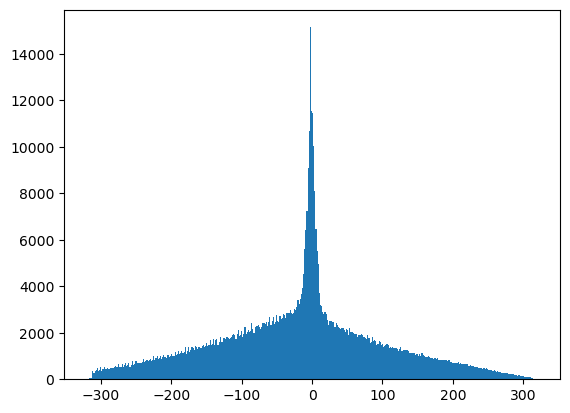

In [134]:
#analisi con il leading edge
timeres=np.array(paired_letime_1) - np.array(paired_letime_2)
plt.hist(timeres, bins=400)
#plt.xlim(-200, 200)

In [205]:
#analisi con la waveform

timeresol = []
badres = []

for event in range(N_ev):
    try:
        bl1 = np.mean(paired_wf_1[event][:16])
        bl2 = np.mean(paired_wf_2[event][:16])

        # Find the index where the waveform goes below -0.02 V
        t1_start = np.where(paired_wf_1[event] < -0.02)[0][0]
        t2_start = np.where(paired_wf_2[event] < -0.02)[0][0]

        # Find the index where the mean value of the next 60 samples stays below -0.02 V
        t1_end = t1_start
        while t1_end < len(paired_wf_1[event]) - 60:
            # Calculate the mean value of the next 60 samples
            avg_next_60 = np.mean(paired_wf_1[event][t1_end:t1_end + 60])

            # Check if the average stays below -0.02 V
            if avg_next_60 >= -0.02:
                break  # Exit the loop if condition is not met

            # Increment the end index to move to the next sample
            t1_end += 1

        t2_end = t2_start
        while t2_end < len(paired_wf_2[event]) - 60:
            # Calculate the mean value of the next 60 samples
            avg_next_60 = np.mean(paired_wf_2[event][t2_end:t2_end + 60])

            # Check if the average stays below -0.02 V
            if avg_next_60 >= -0.02:
                break  # Exit the loop if condition is not met

            # Increment the end index to move to the next sample
            t2_end += 1

        # Calculate the time difference
        time_diff = t1_end - t2_end
        timeresol.append(time_diff)

        if abs(time_diff) > 20:
            badres.append(event)

    except IndexError:
        # Skip events where the condition is not met
        continue

timeresol = np.array(timeresol) * 0.312  # Assuming the time resolution is in nanoseconds


(-20.0, 20.0)

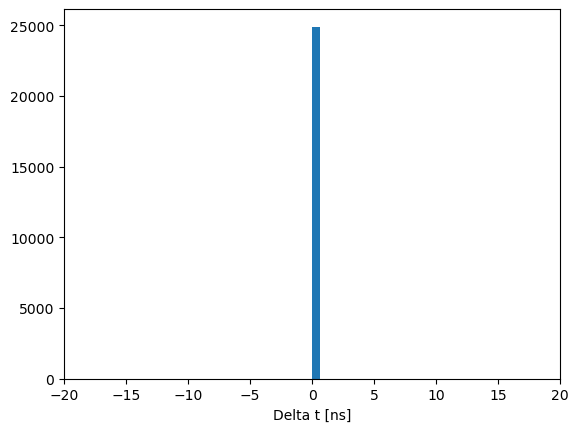

In [208]:
_= plt.hist(timeresol, bins=1000)
plt.xlabel('Delta t [ns]')
plt.xlim(-20, 20)

In [211]:
#compute standard deviation
print(np.std(timeresol))
#exclude accidental coincidences
not_accidental = timeresol[(timeresol >= -10) & (timeresol <= 10)]
print(np.std(not_accidental))

61.76257087625469
0.6055268085502313


(-20.0, 20.0)

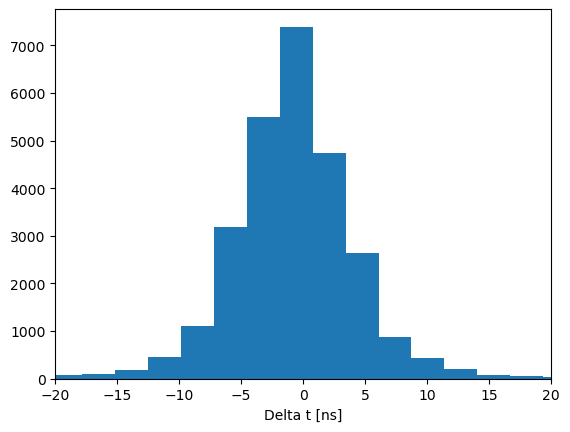

In [200]:
#analisi sulla waveform ma senza il calcolo della media dei sample successivi

timeresol_2=[]
badres_2=[]
for event in range(N_ev):
    try:
        bl1 = np.mean(paired_wf_1[event][:16])
        bl2 = np.mean(paired_wf_2[event][:16])
        sigma_bl_1 = np.std(paired_wf_1[event][:16])
        sigma_bl_2 = np.std(paired_wf_2[event][:16])

        # Find the index where the waveform crosses the threshold
        t1 = np.where(paired_wf_1[event] < bl1 - 0.02)[0][0]
        t2 = np.where(paired_wf_2[event] < bl2 - 0.02)[0][0]

        # Calculate the time resolution
        time_diff = t1 - t2
        timeresol_2.append(time_diff)
        if(abs(time_diff) > 20): badres.append(event) #
    except IndexError:
        # Skip the event if the condition is not verified
        continue


timeresol_2=np.array(timeresol_2)*0.312
_= plt.hist(timeresol_2, bins=200)
plt.xlabel('Delta t [ns]')
plt.xlim(-20, 20)

In [201]:
print(np.size(badres))

5415
